## Урок 4. Визуальный анализ данных

### Условие 1: Задача 1
Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
sns.set_style("whitegrid")
sns.set_palette("Dark2")

#### 1.1. Скачать следующие данные: kc-house-data

In [144]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 1.2. Изучите стоимости недвижимости

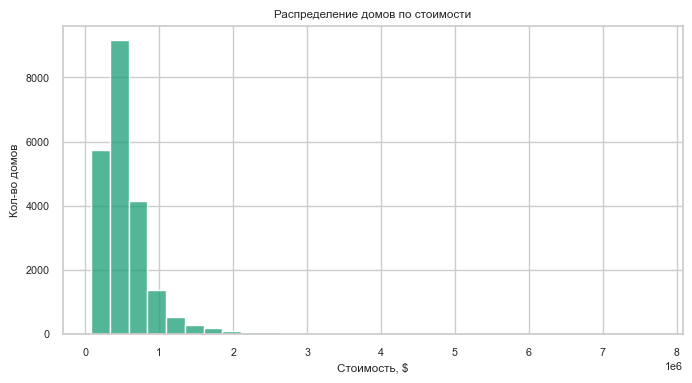

In [145]:
plt.figure(figsize=(8, 4))

sns.histplot(df['price'], bins=30)

plt.title('Распределение домов по стоимости')
plt.xlabel('Стоимость, $')
plt.ylabel('Кол-во домов');

**Вывод:** Стоимость наибольшего числа домов находится в пределах 500 000 $

#### 1.3. Изучите распределение квадратуры жилой площади

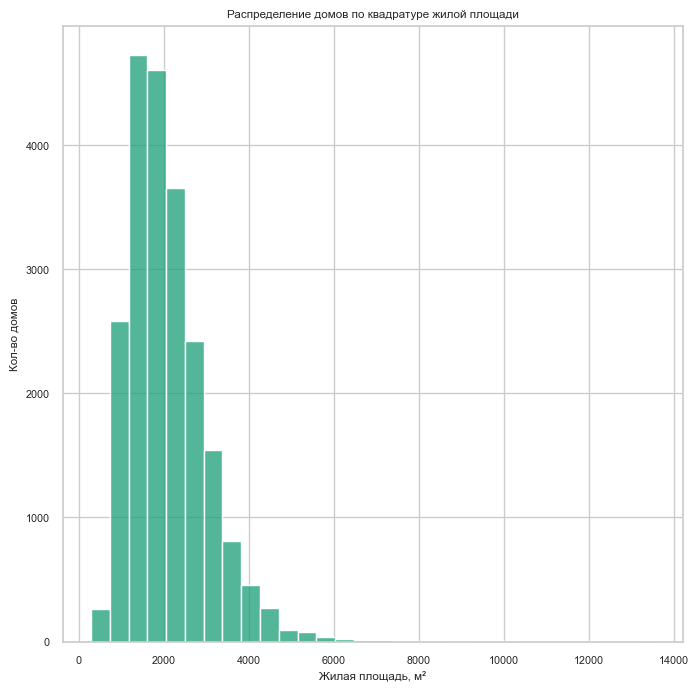

In [146]:
plt.figure(figsize=(8, 8))

sns.histplot(df['sqft_living'], bins=30)

plt.title('Распределение домов по квадратуре жилой площади')
plt.xlabel('Жилая площадь, м²')
plt.ylabel('Кол-во домов');

##### **Вывод:** Наибольшее число домов имеет жилую площадь в диапазоне от 500 до 2500 м²

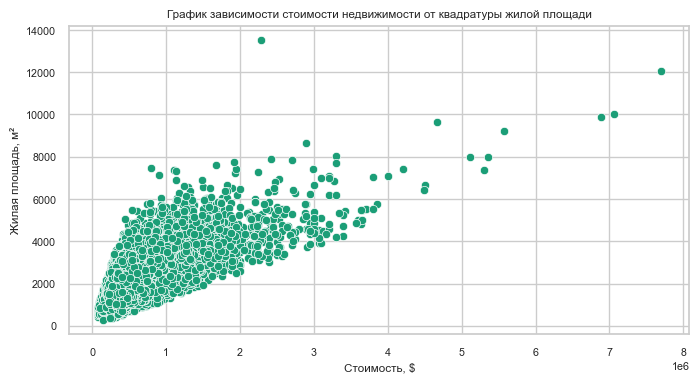

In [147]:
plt.figure(figsize=(8, 4))

sns.scatterplot(x=df['price'], y=df['sqft_living'])

plt.title('График зависимости стоимости недвижимости от квадратуры жилой площади')
plt.xlabel('Стоимость, $')
plt.ylabel('Жилая площадь, м²');

**Вывод:** Стоимость недвижимости прямо пропорциональна квадратуре ее жилой площади

#### 1.4. Изучите распределение года постройки

In [148]:
df['yr_built'].min(), df['yr_built'].max()

(1900, 2015)

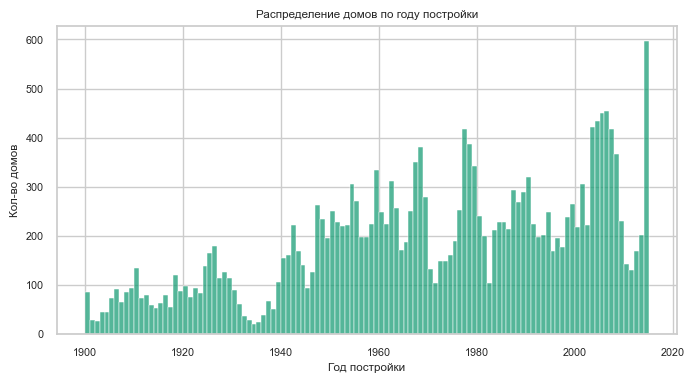

In [149]:
plt.figure(figsize=(8, 4))

sns.histplot(df['yr_built'], bins=115)

plt.title('Распределение домов по году постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во домов');

**Вывод:** Строительство домов в регионе ведется с 1900 года, постепенно его масштбалы нарастают. В некоторые годы наблюдаются провалы, в другие, наоброт, пики, видимо обусловленные экономической ситуацией в стране. Например спад в 1930-хх гг. видимо обусловлен периодом "Великой депрессии". Пик строительства наблюдается в 2015 г.

### Условие 2: 2 задача

#### 2.1. Изучите распределение домов от наличия вида на набережную
Постройте график

Сделайте выводы

In [150]:
waterfront = df['waterfront'].value_counts()
waterfront.index = ['no', 'yes']
waterfront.head()

no     21450
yes      163
Name: waterfront, dtype: int64

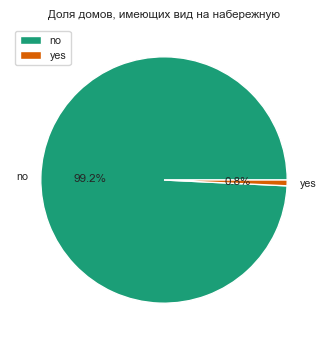

In [151]:
plt.figure(figsize=(6, 4))

plt.pie(waterfront, autopct='%1.1f%%', labels=waterfront.index)

plt.title('Доля домов, имеющих вид на набережную')
plt.legend(loc='upper left');

**Вывод:** Только 0,8% домов имеют вид на набережную

#### 2.2. Изучите распределение этажей домов

In [152]:
floors = df['floors'].value_counts().sort_index()
floors.head()

1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
Name: floors, dtype: int64

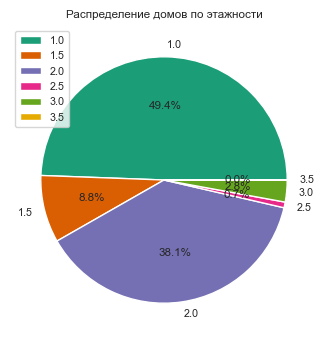

In [153]:
plt.figure(figsize=(6, 4))

plt.pie(floors, autopct='%1.1f%%', labels=floors.index)

plt.title('Распределение домов по этажности')
plt.legend(loc='upper left');

**Вывод:** Почти половину домов составляют одноэтажные дома, еще 38% - двухэтажные.

#### 2.3. Изучите распределение состояния домов

In [154]:
condition = df['condition'].value_counts().sort_index()
condition.head()

1       30
2      172
3    14031
4     5679
5     1701
Name: condition, dtype: int64

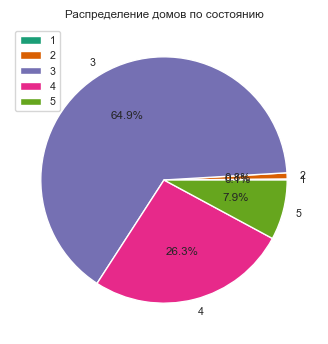

In [155]:
plt.figure(figsize=(6, 4))

plt.pie(condition, autopct='%1.1f%%', labels=condition.index)

plt.title('Распределение домов по состоянию')
plt.legend(loc='upper left');

**Вывод:** Большая часть домов, почти 65%, находится в среднем состоянии (оценка 3), еще четверть домов в хорошем состоянии (оценка 4).

### Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [156]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

В исходной базе данных наряду со стоимостью изучаются такие параметры, как количество спален и ванных комнат, жилая и общая площади, этажность, наличие вида на набережную, годы постройки и реновации, наличие подвала, расположение и некоторые другие.

В качестве примера возьмем несколько характеристик и проверим, влияют ли они на стоимость недвижимости. 

**Гипотеза** состоит в том, что на стоимость недвижимости будут влиять: *наличие набережной, общая оценка (грейд), вид, квадратура жилой площади, расположение*.

Не будет значимо влиять *наличие подвала*.

Зависимость стоимости недвижимости от квадратуры жилой площади мы уже проверяли ранее в п. **1.3** данного задания.

**3.1** Сначала проверим зависимость стоимости от наличия вида на набережную.

In [157]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

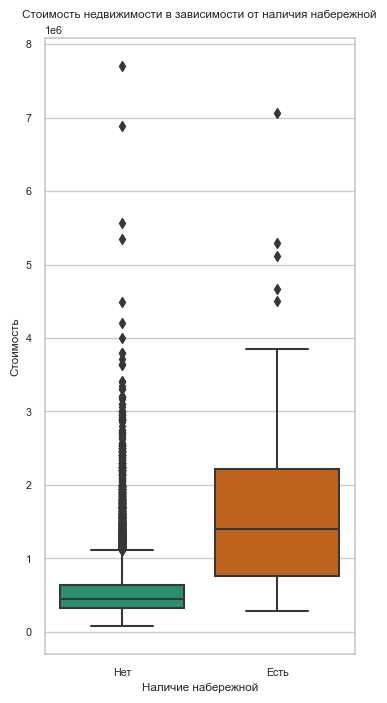

In [158]:
plt.figure(figsize=(4,8))
sns.boxplot(x=df['waterfront'], y=df['price'], whis=1.5)


plt.xlabel('Наличие набережной')
plt.ylabel('Стоимость')
plt.title('Стоимость недвижимости в зависимости от наличия набережной')
plt.xticks([0, 1], ['Нет', 'Есть']);

**Вывод** Наличие вида на набережную увеличивает стоимость недвижимости.

**3.2** Затем проверим зависимость стоимости от наличия подвала, и предполагаем, что ее не будет.

In [159]:
df['basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0  else 0) # создаем столбец с признаком наличия или отсутствия подвала
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


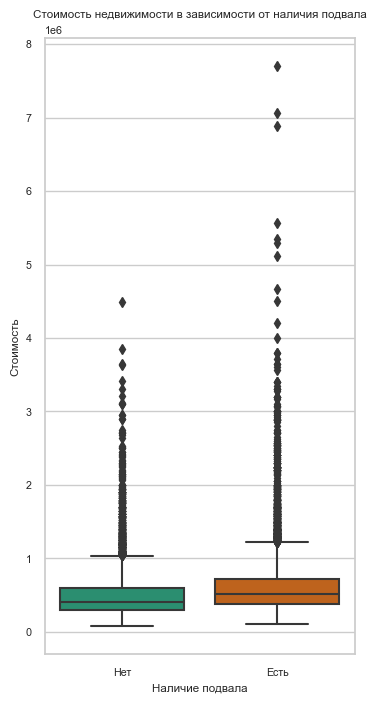

In [160]:
plt.figure(figsize=(4,8))
sns.boxplot(x=df['basement'], y=df['price'], whis=1.5)

plt.xlabel('Наличие подвала')
plt.ylabel('Стоимость')
plt.title('Стоимость недвижимости в зависимости от наличия подвала')
plt.xticks([0, 1], ['Нет', 'Есть']);

**Вывод** Как мы и предполагали, наличие подвала не влияет на стоимость недвижимости.

**3.3** Далее посмотрим зависимость стоимости домов от общей оценки (грейда)

<Figure size 800x800 with 0 Axes>

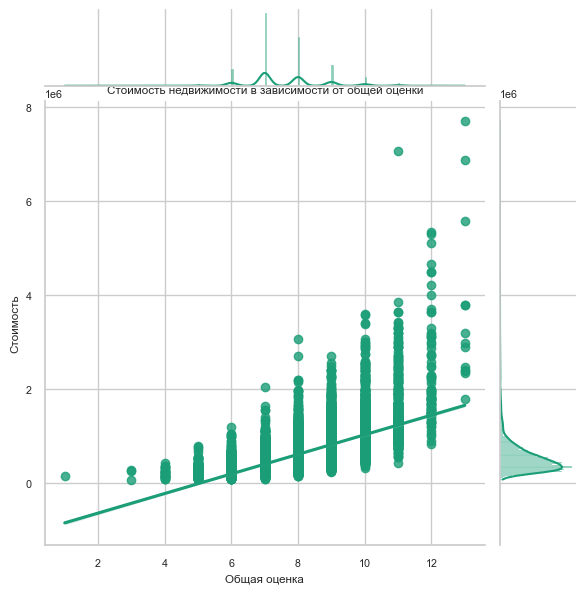

In [161]:
plt.figure(figsize=(8,8))

sns.jointplot(x=df['grade'], y=df['price'], kind='reg');

plt.xlabel('Общая оценка')
plt.ylabel('Стоимость')
plt.title('Стоимость недвижимости в зависимости от общей оценки');

**Вывод** Стоимость недвижимости прямо пропорциональна общей оценке недвижимости

**3.4** Проверим зависимость стоимости недвижимости от вида

<Figure size 800x800 with 0 Axes>

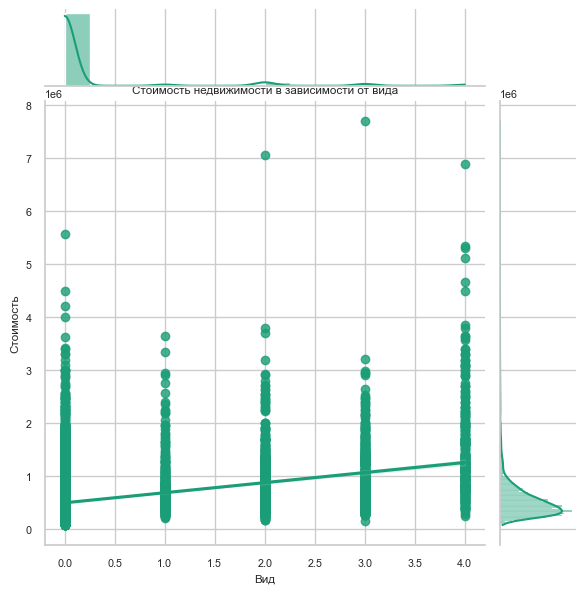

In [162]:
plt.figure(figsize=(8,8))

sns.jointplot(x=df['view'], y=df['price'], kind='reg');

plt.xlabel('Вид')
plt.ylabel('Стоимость')
plt.title('Стоимость недвижимости в зависимости от вида');

**Вывод** Стоимость недвижимости прямо пропорциональна качеству вида.

**3.5** Проверим зависимость стоимости дома от его расположения.

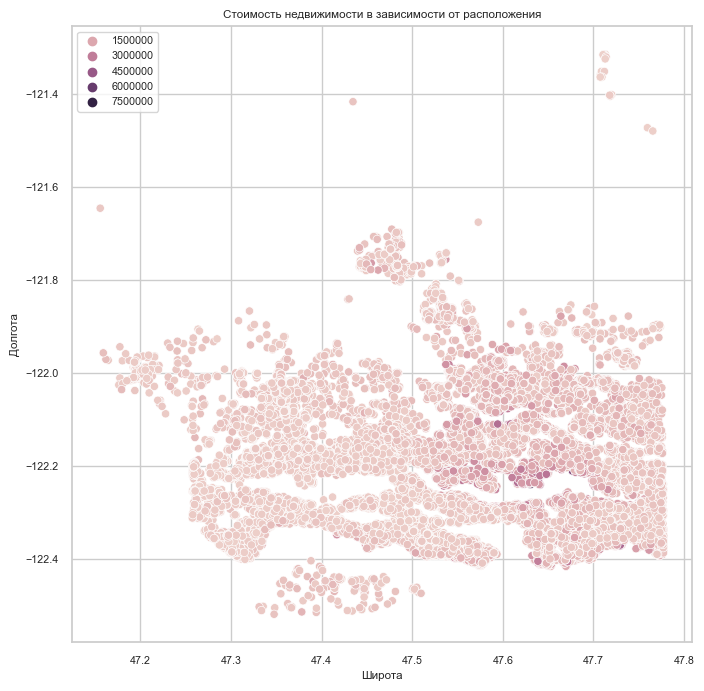

In [165]:
plt.figure(figsize=(8,8))

sns.scatterplot(x=df['lat'], y=df['long'], hue=df['price'])

plt.xlabel('Широта')
plt.ylabel('Долгота')
plt.title('Стоимость недвижимости в зависимости от расположения')
plt.legend();

**Вывод** На получившемся графики видны области, где цена на недвижимость выше, в сравнении с другими.

Таким образом, мы показали зависимость стоимости недвижимости от *наличия набережной, общей оценки (грейда), вида, квадратуры жилой площади, расположения*, и отсутсвие зависимости от *наличия подвала*.